In [1]:
import deepxde as dde
import numpy as np
from deepxde.backend import pytorch
import torch
import matplotlib.pyplot as plt
from SIRD_deepxde_class import SIRD_deepxde_net
from SIRD_deepxde_class import Plot

np.random.seed(0)

Using backend: pytorch



In [2]:
alpha_real = 0.2
beta_real = 0.05
gamma_real = 0.01

total  [2.10918900e+05 1.61564795e+03 4.04904713e+06 8.44379541e+05]
total  5105961.215454253


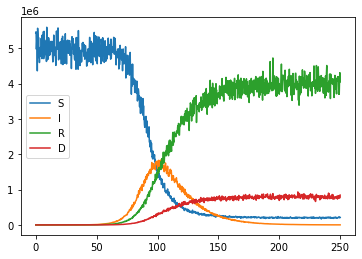

In [3]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth, wsol_synth, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
wsol_synth = solver.add_noise(wsol_synth, scale_pct=0.05)
solver.plot_SIRD(t_synth, wsol_synth)

In [4]:
max_timestep = 85
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]

In [5]:
model = SIRD_deepxde_net(t, wsol)
model.init_model(print_every=1000)
model.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000188 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [4.56e-03, 2.49e-04, 4.79e-03, 1.12e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.25e-01, 3.94e-03, 4.36e-01, 2.27e-02, 8.92e-02, 1.67e-02, 4.57e-01, 2.06e-02]    [4.56e-03, 2.49e-04, 4.79e-03, 1.12e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.25e-01, 3.94e-03, 4.36e-01, 2.27e-02, 8.92e-02, 1.67e-02, 4.57e-01, 2.06e-02]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [4.43e-05, 6.27e-06, 7.09e-07, 3.24e-07, 1.16e-06, 2.33e-07, 4.84e-06, 7.68e-08, 3.03e-03, 4.41e-04, 6.32e-05, 7.36e-06, 2.58e-04, 5.82e-05, 2.92e-05, 2.13e-06]    [4.43e-05, 6.27e-06, 7.09e-07, 3.24

# Neumann BC

In [6]:
model_neu = SIRD_deepxde_net(t, wsol, with_neumann=True)
model_neu.init_model(print_every=4000)
model_neu.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model_neu.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_neu.set_synthetic_data(t_synth, wsol_synth)
model_neu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000386 s

Training model...

Step      Train loss                                                                                                                                                                                                  Test loss                                                                                                                                                                                                   Test metric
0         [2.49e-03, 4.63e-03, 3.34e-04, 1.83e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.34e+00, 2.82e-02, 7.08e-04, 6.10e-02, 1.84e+00, 5.83e-04, 2.06e-03, 5.87e-02, 2.28e-02, 5.24e-03, 1.78e-03, 2.40e-08]    [2.49e-03, 4.63e-03, 3.34e-04, 1.83e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.34e+00, 2.82e-02, 7.08e-04, 6.10e-02, 1.84e+00, 5.83e-04, 2.06e-03, 5.87e-02, 2.28e-02, 5.24e-03, 1.78e-03, 2.40e-08]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [7.51e-05, 3.83e-06, 8.92e-06, 3.59e-06

In [7]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_neu = Plot(model_neu, values_to_plot=values_to_plot)

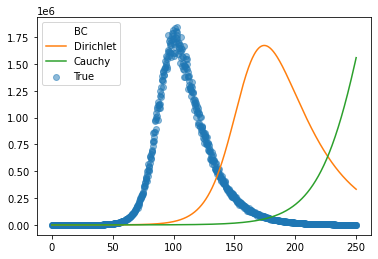

In [8]:
fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model.model.t_synth, plot_model.model.wsol_nn_synth[:,1], color=plot_model.colors[1], label='Dirichlet')
line = ax.plot(plot_model_neu.model.t_synth, plot_model_neu.model.wsol_nn_synth[:,1], color=plot_model_neu.colors[2], label='Cauchy')
ax.legend(title='BC')

total  [2.04643018e+05 1.47928048e+03 3.99489808e+06 7.98979617e+05]
total  5000000.000000002


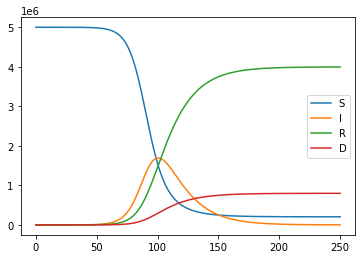

In [9]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth_p, wsol_synth_p, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
solver.plot_SIRD(t_synth_p, wsol_synth_p)
max_timestep = 85
t_bool = t_synth_p < max_timestep
t_p = t_synth_p[t_bool]
wsol_p = wsol_synth_p[t_bool]

In [10]:
model_p = SIRD_deepxde_net(t_p, wsol_p)
model_p.init_model(print_every=1000)
model_p.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model_p.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_p.set_synthetic_data(t_synth_p, wsol_synth_p)
model_p.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000119 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.42e-03, 1.62e-03, 2.29e-04, 5.59e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 1.35e+00, 9.18e-03, 2.73e-02, 4.64e-01, 8.18e-01, 2.72e-02, 6.23e-02, 3.85e-01]    [1.42e-03, 1.62e-03, 2.29e-04, 5.59e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 1.35e+00, 9.18e-03, 2.73e-02, 4.64e-01, 8.18e-01, 2.72e-02, 6.23e-02, 3.85e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [1.13e-05, 6.08e-06, 1.94e-06, 1.70e-06, 4.12e-06, 3.18e-05, 2.79e-08, 1.15e-07, 2.19e-03, 8.39e-04, 2.27e-04, 3.95e-05, 8.24e-04, 2.50e-04, 4.13e-05, 9.29e-07]    [1.13e-05, 6.08e-06, 1.94e-06, 1.70

In [11]:
model_neu_p = SIRD_deepxde_net(t_p, wsol_p, with_neumann=True)
model_neu_p.init_model(print_every=4000)
model_neu_p.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model_neu_p.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_neu_p.set_synthetic_data(t_synth_p, wsol_synth_p)
model_neu_p.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000294 s

Training model...

Step      Train loss                                                                                                                                                                                                  Test loss                                                                                                                                                                                                   Test metric
0         [2.04e-04, 2.80e-02, 6.14e-03, 7.31e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 8.90e-01, 4.92e-01, 7.43e-02, 4.86e-01, 4.92e-01, 2.14e-01, 1.49e-01, 5.58e-01, 6.57e-04, 2.34e-04, 7.63e-05, 3.12e-06]    [2.04e-04, 2.80e-02, 6.14e-03, 7.31e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 8.90e-01, 4.92e-01, 7.43e-02, 4.86e-01, 4.92e-01, 2.14e-01, 1.49e-01, 5.58e-01, 6.57e-04, 2.34e-04, 7.63e-05, 3.12e-06]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [1.16e-05, 1.97e-05, 3.70e-06, 2.67e-07

In [12]:
values_to_plot = ['I']
plot_model_p = Plot(model_p, values_to_plot=values_to_plot)
plot_model_neu_p = Plot(model_neu_p, values_to_plot=values_to_plot)

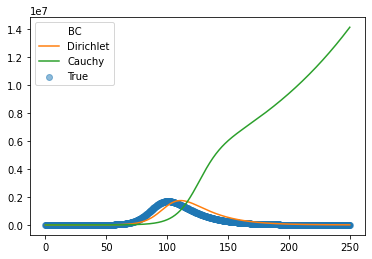

In [13]:
fig, ax = plt.subplots()
line = ax.scatter(plot_model_p.model.t_nn_synth, plot_model_p.model.wsol_synth[:,1], color=plot_model_p.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_p.model.t_synth, plot_model_p.model.wsol_nn_synth[:,1], color=plot_model_p.colors[1], label='Dirichlet')
line = ax.plot(plot_model_neu_p.model.t_synth, plot_model_neu_p.model.wsol_nn_synth[:,1], color=plot_model_neu_p.colors[2], label='Cauchy')
ax.legend(title='BC')

# Weight tail higher

# Activation functions

* ReLU
* Leaky ReLU
* Elu
* Sigmoid
* Tanh

In [14]:
model_relu = SIRD_deepxde_net(t, wsol)
model_relu.init_model(print_every=4000, activation='relu')
model_relu.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_relu.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_relu.set_synthetic_data(t_synth, wsol_synth)
model_relu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000114 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [2.79e+00, 6.50e+00, 1.78e-01, 1.75e-01, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.25e+01, 1.81e+01, 4.44e-01, 8.46e-01, 2.93e+01, 5.26e+01, 1.22e+00, 2.50e+00]    [2.79e+00, 6.50e+00, 1.78e-01, 1.75e-01, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.25e+01, 1.81e+01, 4.44e-01, 8.46e-01, 2.93e+01, 5.26e+01, 1.22e+00, 2.50e+00]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [6.75e-05, 2.17e-05, 8.02e-06, 9.76e-06, 1.18e-07, 7.65e-08, 1.95e-06, 4.05e-07, 3.61e-03, 7.28e-04, 1.10e-04, 9.58e-05, 1.57e-03, 2.60e-04, 2.61e-04, 2.07e-05]    [6.75e-05, 2.17e-05, 8.02e-06, 9.76

In [17]:
model_elu = SIRD_deepxde_net(t, wsol)
model_elu.init_model(print_every=4000, activation='elu')
model_elu.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_elu.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_elu.set_synthetic_data(t_synth, wsol_synth)
model_elu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000286 s

Training model...

0         [8.47e+00, 5.33e+00, 2.75e-01, 1.69e-01, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.75e+01, 1.14e+01, 1.09e+02, 2.30e+01, 1.14e+02, 3.53e+01, 3.23e+02, 4.54e+01]    [8.47e+00, 5.33e+00, 2.75e-01, 1.69e-01, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.75e+01, 1.14e+01, 1.09e+02, 2.30e+01, 1.14e+02, 3.53e+01, 3.23e+02, 4.54e+01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [6.09e-05, 1.20e-04, 1.16e-05, 2.47e-05, 2.38e-07, 8.84e-10, 1.52e-08, 1.49e-08, 2.07e-03, 1.14e-04, 2.37e-05, 1.87e-05, 4.48e-05, 1.48e-05, 3.04e-06, 4.33e-08]    [6.09e-05, 1.20e-04, 1.16e-05, 2.47e-05, 2.38e-07, 8.84e-10, 1.52e-08, 1.49e-08, 2.07e-03, 1.14e-04, 2.37e-05, 1.87e-05, 4.48e-05, 1.48e-05, 3.04e-06, 4.33e-08]    []  
2000      [5.72e-05, 3.88e-05, 3.89e-06, 5.14e-06, 2.86e-07, 7.36e-08, 1.01e-08, 2.90e-07, 1.95e-03, 5.59e-05, 2.24e-05, 2.03e-05, 1.59e-04, 5.30e-05, 6.01e-06, 5.49e-08]    [5.72e-05, 3.88e-05, 3.89e-06, 5.14e-06, 2

In [18]:
model_sig = SIRD_deepxde_net(t, wsol)
model_sig.init_model(print_every=4000, activation='sigmoid')
model_sig.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_sig.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_sig.set_synthetic_data(t_synth, wsol_synth)
model_sig.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000223 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.47e-03, 1.94e-03, 1.71e-03, 1.72e-03, 5.83e-03, 1.76e-01, 8.75e-02, 4.38e-01, 6.21e-03, 1.86e-01, 8.61e-02, 4.20e-01, 7.64e-02, 3.27e-01, 5.49e-02, 4.35e-01]    [1.47e-03, 1.94e-03, 1.71e-03, 1.72e-03, 5.83e-03, 1.76e-01, 8.75e-02, 4.38e-01, 6.21e-03, 1.86e-01, 8.61e-02, 4.20e-01, 7.64e-02, 3.27e-01, 5.49e-02, 4.35e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]


C:\Users\willi\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1000      [3.17e-05, 3.40e-07, 1.67e-07, 7.30e-08, 2.57e-07, 6.47e-09, 7.30e-09, 1.86e-09, 1.92e-03, 1.82e-05, 2.89e-06, 1.47e-06, 8.88e-06, 1.38e-06, 6.34e-08, 1.85e-07]    [3.17e-05, 3.40e-07, 1.67e-07, 7.30e-08, 2.57e-07, 6.47e-09, 7.30e-09, 1.86e-09, 1.92e-03, 1.82e-05, 2.89e-06, 1.47e-06, 8.88e-06, 1.38e-06, 6.34e-08, 1.85e-07]    []  
2000      [3.46e-05, 6.84e-07, 2.88e-07, 6.86e-08, 2.74e-06, 1.20e-08, 3.09e-07, 2.64e-08, 1.90e-03, 2.05e-05, 5.87e-06, 1.19e-06, 4.22e-06, 1.57e-06, 5.85e-10, 1.22e-09]    [3.46e-05, 6.84e-07, 2.88e-07, 6.86e-08, 2.74e-06, 1.20e-08, 3.09e-07, 2.64e-08, 1.90e-03, 2.05e-05, 5.87e-06, 1.19e-06, 4.22e-06, 1.57e-06, 5.85e-10, 1.22e-09]    []  
3000      [3.35e-05, 1.28e-06, 8.62e-07, 2.76e-07, 1.58e-04, 4.51e-05, 3.67e-05, 4.17e-06, 2.31e-03, 1.56e-04, 6.19e-05, 5.72e-06, 1.67e-03, 5.86e-04, 1.66e-04, 4.95e-06]    [3.35e-05, 1.28e-06, 8.62e-07, 2.76e-07, 1.58e-04, 4.51e-05, 3.67e-05, 4.17e-06, 2.31e-03, 1.56e-04, 6.19e-05, 5.72e-06, 1.67e-03, 5.86e-04,

In [20]:
model_tanh = SIRD_deepxde_net(t, wsol)
model_tanh.init_model(print_every=4000, activation='tanh')
model_tanh.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_tanh.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_tanh.set_synthetic_data(t_synth, wsol_synth)
model_tanh.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000181 s

Training model...

0         [1.09e-02, 1.43e-01, 1.77e-02, 1.86e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.29e+00, 1.80e+00, 3.62e-02, 9.06e-02, 1.67e+00, 2.18e+00, 5.14e-02, 8.17e-02]    [1.09e-02, 1.43e-01, 1.77e-02, 1.86e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.29e+00, 1.80e+00, 3.62e-02, 9.06e-02, 1.67e+00, 2.18e+00, 5.14e-02, 8.17e-02]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [5.85e-05, 4.32e-06, 5.18e-06, 4.78e-05, 2.26e-04, 5.73e-05, 1.74e-05, 1.82e-06, 1.20e-02, 3.41e-03, 7.15e-04, 5.14e-05, 5.18e-04, 4.43e-05, 2.35e-07, 2.16e-06]    [5.85e-05, 4.32e-06, 5.18e-06, 4.78e-05, 2.26e-04, 5.73e-05, 1.74e-05, 1.82e-06, 1.20e-02, 3.41e-03, 7.15e-04, 5.14e-05, 5.18e-04, 4.43e-05, 2.35e-07, 2.16e-06]    []  
2000      [3.36e-05, 2.09e-06, 9.91e-07, 1.15e-06, 1.74e-04, 3.54e-05, 5.53e-04, 6.85e-07, 3.01e-03, 5.20e-04, 3.78e-04, 1.14e-05, 6.52e-04, 1.74e-04, 1.26e-04, 3.72e-08]    [3.36e-05, 2.09e-06, 9.91e-07, 1.15e-06, 1

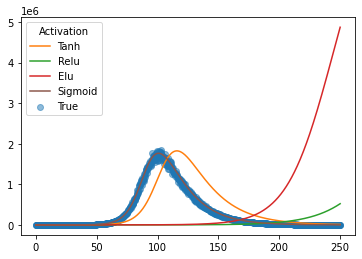

In [21]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_tanh = Plot(model_tanh, values_to_plot=values_to_plot)
plot_model_relu = Plot(model_relu, values_to_plot=values_to_plot)
plot_model_elu = Plot(model_elu, values_to_plot=values_to_plot)
plot_model_sig = Plot(model_sig, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_tanh.model.t_synth, plot_model_tanh.model.wsol_nn_synth[:,1], color=plot_model_tanh.colors[1], label='Tanh')
line = ax.plot(plot_model_relu.model.t_synth, plot_model_relu.model.wsol_nn_synth[:,1], color=plot_model_relu.colors[2], label='Relu')
line = ax.plot(plot_model_elu.model.t_synth, plot_model_elu.model.wsol_nn_synth[:,1], color=plot_model_elu.colors[3], label='Elu')
line = ax.plot(plot_model_sig.model.t_synth, plot_model_sig.model.wsol_nn_synth[:,1], color='C5', label='Sigmoid')

ax.legend(title='Activation')

# Layer size

In [22]:
iterations=6000

In [23]:
model_2l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 2 + [4]
model_2l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000229 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [4.26e-03, 1.19e-02, 2.95e-03, 7.21e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.30e-01, 1.54e-01, 1.89e-02, 2.71e-01, 4.57e-01, 1.11e-01, 4.74e-05, 3.61e-01]    [4.26e-03, 1.19e-02, 2.95e-03, 7.21e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.30e-01, 1.54e-01, 1.89e-02, 2.71e-01, 4.57e-01, 1.11e-01, 4.74e-05, 3.61e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [4.88e-05, 4.75e-06, 2.31e-06, 5.02e-07, 2.76e-09, 5.05e-08, 8.96e-08, 1.69e-10, 4.32e-03, 6.90e-04, 1.30e-04, 4.33e-06, 4.62e-04, 1.28e-04, 1.97e-05, 8.72e-07]    [4.88e-05, 4.75e-06, 2.31e-06, 5.02

In [24]:
model_3l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 3 + [4]
model_3l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000186 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.05e-03, 1.79e-03, 1.06e-03, 3.75e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.37e-01, 7.06e-02, 5.43e-01, 5.75e-01, 3.77e-02, 1.52e-02, 6.46e-01, 6.30e-01]    [1.05e-03, 1.79e-03, 1.06e-03, 3.75e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.37e-01, 7.06e-02, 5.43e-01, 5.75e-01, 3.77e-02, 1.52e-02, 6.46e-01, 6.30e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [3.32e-05, 6.59e-06, 2.86e-06, 1.04e-06, 2.84e-07, 2.02e-06, 1.56e-08, 1.85e-06, 3.66e-03, 5.41e-04, 2.61e-04, 2.08e-05, 7.62e-04, 2.96e-04, 2.91e-05, 2.51e-05]    [3.32e-05, 6.59e-06, 2.86e-06, 1.04

In [25]:
model_4l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 4 + [4]
model_4l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000129 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [2.11e-03, 1.99e-02, 3.25e-03, 7.86e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.80e+00, 2.75e-01, 2.53e-02, 3.23e-01, 1.24e+00, 1.44e-01, 5.01e-02, 3.27e-01]    [2.11e-03, 1.99e-02, 3.25e-03, 7.86e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.80e+00, 2.75e-01, 2.53e-02, 3.23e-01, 1.24e+00, 1.44e-01, 5.01e-02, 3.27e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [1.70e-05, 4.26e-06, 8.55e-07, 2.95e-06, 3.91e-05, 4.43e-04, 1.25e-05, 2.59e-05, 2.41e-03, 7.22e-04, 5.22e-05, 2.88e-05, 3.69e-03, 1.89e-05, 1.96e-04, 8.98e-05]    [1.70e-05, 4.26e-06, 8.55e-07, 2.95

In [26]:
model_5l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 5 + [4]
model_5l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000119 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [2.59e-03, 4.09e-02, 5.79e-03, 6.03e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.38e+00, 6.38e-01, 1.49e-02, 6.19e-03, 8.22e-01, 7.90e-01, 2.78e-02, 2.60e-03]    [2.59e-03, 4.09e-02, 5.79e-03, 6.03e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.38e+00, 6.38e-01, 1.49e-02, 6.19e-03, 8.22e-01, 7.90e-01, 2.78e-02, 2.60e-03]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [3.70e-05, 1.27e-06, 1.02e-06, 6.09e-07, 2.61e-07, 8.53e-06, 9.42e-09, 1.48e-05, 2.50e-03, 1.11e-04, 4.03e-05, 1.71e-05, 1.19e-03, 4.82e-04, 3.60e-05, 4.48e-06]    [3.70e-05, 1.27e-06, 1.02e-06, 6.09

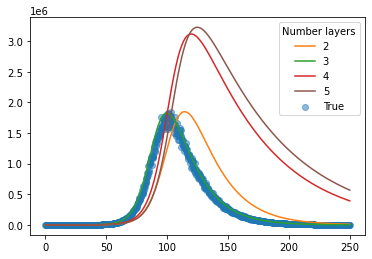

In [27]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_2l = Plot(model_2l, values_to_plot=values_to_plot)
plot_model_3l = Plot(model_3l, values_to_plot=values_to_plot)
plot_model_4l = Plot(model_4l, values_to_plot=values_to_plot)
plot_model_5l = Plot(model_5l, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_2l.model.t_synth, plot_model_2l.model.wsol_nn_synth[:,1], color=plot_model_2l.colors[1], label='2')
line = ax.plot(plot_model_3l.model.t_synth, plot_model_3l.model.wsol_nn_synth[:,1], color=plot_model_3l.colors[2], label='3')
line = ax.plot(plot_model_4l.model.t_synth, plot_model_4l.model.wsol_nn_synth[:,1], color=plot_model_4l.colors[3], label='4')
line = ax.plot(plot_model_5l.model.t_synth, plot_model_5l.model.wsol_nn_synth[:,1], color='C5', label='5')

ax.legend(title='Number layers')

# Initializer?

# Learn rate (optimizer)

In [28]:
iterations=6000

In [29]:
model_0001l = SIRD_deepxde_net(t, wsol)
lr=0.001
model_0001l.run_all(t_synth, wsol_synth, solver, lr=lr, iterations=iterations)

Compiling model...
'compile' took 0.000112 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [4.22e-03, 4.64e-02, 7.05e-03, 5.58e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.20e+00, 5.89e-01, 4.95e-02, 1.54e-01, 1.55e+00, 3.03e-01, 1.19e-01, 1.66e-01]    [4.22e-03, 4.64e-02, 7.05e-03, 5.58e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.20e+00, 5.89e-01, 4.95e-02, 1.54e-01, 1.55e+00, 3.03e-01, 1.19e-01, 1.66e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [5.00e-05, 9.59e-06, 4.48e-06, 1.00e-05, 6.80e-08, 2.28e-08, 3.00e-08, 5.76e-08, 3.98e-03, 5.90e-04, 8.48e-05, 5.14e-05, 1.85e-04, 3.51e-05, 1.30e-06, 6.17e-06]    [5.00e-05, 9.59e-06, 4.48e-06, 1.00

In [30]:
model_001l = SIRD_deepxde_net(t, wsol)
lr=0.01
model_001l.run_all(t_synth, wsol_synth, solver, lr=lr, iterations=iterations)

Compiling model...
'compile' took 0.000119 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [6.44e-03, 5.31e-03, 1.51e-03, 2.37e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.90e-01, 8.15e-02, 1.50e-01, 1.09e+00, 3.64e-02, 1.15e-01, 1.67e-01, 1.23e+00]    [6.44e-03, 5.31e-03, 1.51e-03, 2.37e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.90e-01, 8.15e-02, 1.50e-01, 1.09e+00, 3.64e-02, 1.15e-01, 1.67e-01, 1.23e+00]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [4.43e-05, 2.21e-06, 2.30e-06, 6.13e-07, 8.54e-06, 1.80e-07, 5.07e-06, 3.80e-08, 3.17e-03, 3.63e-04, 9.93e-05, 4.80e-06, 1.18e-05, 4.05e-06, 1.52e-05, 7.66e-07]    [4.43e-05, 2.21e-06, 2.30e-06, 6.13

In [31]:
model_01l = SIRD_deepxde_net(t, wsol)
lr=0.1
model_01l.run_all(t_synth, wsol_synth, solver, lr=lr, iterations=iterations)

Compiling model...
'compile' took 0.000139 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [4.11e-03, 1.08e-01, 2.33e-02, 1.96e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.82e+00, 1.44e+00, 4.39e-01, 4.94e-01, 1.23e+00, 1.12e+00, 3.98e-01, 4.05e-01]    [4.11e-03, 1.08e-01, 2.33e-02, 1.96e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.82e+00, 1.44e+00, 4.39e-01, 4.94e-01, 1.23e+00, 1.12e+00, 3.98e-01, 4.05e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [8.42e-05, 6.43e-06, 1.14e-05, 1.07e-05, 2.30e-02, 3.41e-03, 6.02e-04, 2.68e-05, 6.49e-03, 2.93e-03, 5.28e-04, 2.31e-05, 3.77e-02, 1.03e-02, 1.76e-03, 8.03e-05]    [8.42e-05, 6.43e-06, 1.14e-05, 1.07

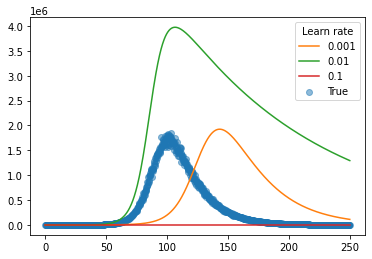

In [33]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_0001l = Plot(model_0001l, values_to_plot=values_to_plot)
plot_model_001l = Plot(model_001l, values_to_plot=values_to_plot)
plot_model_01l = Plot(model_01l, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_0001l.model.t_synth, plot_model_0001l.model.wsol_nn_synth[:,1], color=plot_model_0001l.colors[1], label='0.001')
line = ax.plot(plot_model_001l.model.t_synth, plot_model_001l.model.wsol_nn_synth[:,1], color=plot_model_001l.colors[2], label='0.01')
line = ax.plot(plot_model_01l.model.t_synth, plot_model_01l.model.wsol_nn_synth[:,1], color=plot_model_01l.colors[3], label='0.1')

ax.legend(title='Learn rate')